# COGS 108 - World Happiness Report Analysis



## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Our project is data analysis related to World Happiness Report, which is a landmark survey of the state of global happiness that ranks countries by how happy their citizens perceive themselves to be. Each country in the report has a Happiness Score, which describes the general happiness of a country’s citizens. The report also mentions the factors that are useful to understand the happiness of a country’s citizens, including GDP per capita, social support (having family and friends), healthy life expectancy, freedom (to make life choices), generosity (making donations), and the perceptions of corruption (in the government). In this project, we are going to explore which factor(s) correlate the most to a higher Happiness Score in 2016-2020.

# Names

- Olivia Gale
- Parsia Hedayat
- Tiancheng Ma
- Jumana Sarwar
- Mingjia Zhu

<a id='research_question'></a>
# Research Question

GDP per capita, social support (having family and friends), healthy life expectancy, freedom (to make life choices), generosity (making donations), and the perceptions of corruption (in the government) are factors which the World Happiness Report uses to understand the happiness of a country’s citizens. These factors, chosen by Gallup World Poll and the World Happiness report, might explain a Happiness Score (HS) that describes the general happiness of a country’s citizens. Among the factors listed above, which one(s) correlate the most to a higher Happiness Score?

## Background & Prior Work

What is happiness derived from? How does a country contribute to the general happiness of its citizens? Happiness is a shared human feeling, a feeling that comes not only from ourselves but those around us, and is not solely an individual experience. It’s for this reason that we analyze the “happiness scores” of over 150 countries, where we will see how several factors such as social support, level of corruption of the government, economy, and freedom to make life choices affect the overall happiness of the citizens of a country.

In order to better understand the factors that may influence people’s happiness, we collected the following information and reviewed projects that had performed similar happiness analysis tasks.

**Reference 1:** 

This article introduces two key components of happiness and types of happiness:

•	The balance of emotions: Balance positive and negative emotions, feelings, and moods. Happiness is generally linked to experiencing more positive feelings than negative.

•	Life satisfaction: how satisfied you feel with different areas of your life including your relationships, work, achievements, and other things that you consider important.

Types of happiness:

•	Hedonia: Derived from pleasure. Associated with doing what feels good, self-care, fulfilling desires, experiencing enjoyment, and feeling a sense of satisfaction.

•	Eudaimonia: Derived from seeking virtue and meaning. Important components of eudaimonic well-being include feeling that your life has meaning, value, and purpose. It is associated more with fulfilling responsibilities, investing in long-term goals, concern for the welfare of other people, and living up to personal ideals.

**Reference 2:** Theory about happiness Hedonism theory holds that a happy person is one whose life has more pleasure than pain, and thus, they are also pleasant and “smiley”. Desire theory holds that a happy person is one who gets what they want. Simply put, if your desires are satisfied, you will be happy and so is your life. Objective list theory gives emphasis on things that hold more value on things that have more meaning. A happy person can be one who is poor, ill, and even lonely, but if they have a purpose of a greater good, then they can, in fact, be happy and have a happy life.

**References:**
- 1)Cherry, Kendra. “What Is Happiness?” Very Well Mind, 26 Oct. 2020, www.verywellmind.com/what-is-happiness-4869755.
- 2)Christina, Andreea. “Theories of Happiness: Which One do You Believe?” Simply Andreea, 2017, https://simplyandreea.com/theories-happiness-one-believe/

# Hypothesis

GDP per capita, social support (having family and friends), healthy life expectancy, freedom (to make life choices), generosity (making donations), and the perceptions of corruption (in the government) are factors which the World Happiness Report uses to understand the happiness of a country’s citizens. 

Social support and Freedom are the factors that are most correlated with the general happiness score. People are happier when they have others to rely on and the ability to choose what they want to do with their lives.

# Dataset(s)

Dataset Name: World Happiness Report Data Panel 2008-2020 <br>
Link to the dataset: https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls <br>
Number of observations: 1949 <br>

This dataset contains people’s happiness scores in country level from 2008-2020 as well as data for these factors: GDP per capita, life expectancy, social support, freedom, generosity, and perceptions of corruption. These fields might be related to the happiness scores, which we will use to make a comprehensive analysis of world's happiness status.

# Setup

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from textwrap import wrap
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

Data cleaning steps:

Filter the columns we need: country name, year, Life ladder (Happiness score), Log GDP per capita, social support, healthy life expectancy, freedom to make life choice, generosity, and perceptions of corruptions.
Rename column "Life Ladder" to "Happiness score" to make it clearer.
Filter the years we need: 2016-2020.
Check the basic information (datatypes, number of missing values, min, max, etc.) of the dataset to see if there is any abnormal value.
We got the cleaned dataset we need by the steps above. We confirmed that values in "country name" column are string; values in "year" column are integers, and those in other columns are either float or np.NaN (for missing values). No other messy or unexpected data types present.

We chose to leave the missing values as np.NaN in the dataset. We didn't impute them since the imputed values might not reflect the real situation. We will use the existing data for data analysis in the future. Since the missing values don't take a large part of the dataset (we checked the number of missing values in each column), we could still generate decent results based on existing data.

Happiness score was collected by asking the sampled people in each country the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest" and calculated the averages of them. After checking the minimum and maximum, we found that all of the values are between 0 and 10. The variable is ready to be used.

For GDP per capita, the dataset had already used log transformation to transform the data. This is great for us to do further analysis since after using log transformation, the skewed data became more approximate and normal. It also decreased the effect of outliers in the dataset.

Healthy life expectancy at birth is the average healthy life expectancy for people in each country in each year. This variable is clear and tidy.

Social support, freedom to make life choices, generosity, and perceptions of corruptions are all preprocessed data which were designed to reflect each factor reasonably. No need to change these columns as well.

We checked the basic information of the dataset like min, max, mean in each column and didn't find any abnormal value. Thus this dataset is cleaned.

In [34]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
url = 'https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls'
df = pd.read_excel(url)

df = df[['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 
         'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
         'Perceptions of corruption']]
df = df.rename(columns={'Life Ladder': 'Happiness score'})
df = df[df['year'].isin([2016,2017,2018,2019,2020])].reset_index(drop=True)
df


,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2016,4.220169,7.696560,0.559072,53.000000,0.522566,0.042265,0.793246
1,Afghanistan,2017,2.661718,7.697381,0.490880,52.799999,0.427011,-0.121303,0.954393
2,Afghanistan,2018,2.694303,7.691767,0.507516,52.599998,0.373536,-0.093828,0.927606
3,Afghanistan,2019,2.375092,7.697248,0.419973,52.400002,0.393656,-0.108459,0.923849
4,Albania,2016,4.511101,9.437311,0.638411,68.099998,0.729819,-0.016982,0.901071
...,...,...,...,...,...,...,...,...,...
665,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612
666,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208
667,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209
668,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652


In [35]:
# Check the datatypes
df.dtypes

Country name                         object
year                                  int64
Happiness score                     float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
dtype: object

In [36]:
# Check the number of missing values
df.isna().sum()

Country name                         0
year                                 0
Happiness score                      0
Log GDP per capita                  23
Social support                       1
Healthy life expectancy at birth    21
Freedom to make life choices         6
Generosity                          26
Perceptions of corruption           43
dtype: int64

# Data Analysis & Results

## EDA

In this section, we mainly check the distribution of each variable and the correlations between them. 

### Checking the distributions by plots

In [37]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12, 5)
#matplotlib.rcParams['figure.facecolor'] = '#46055389'

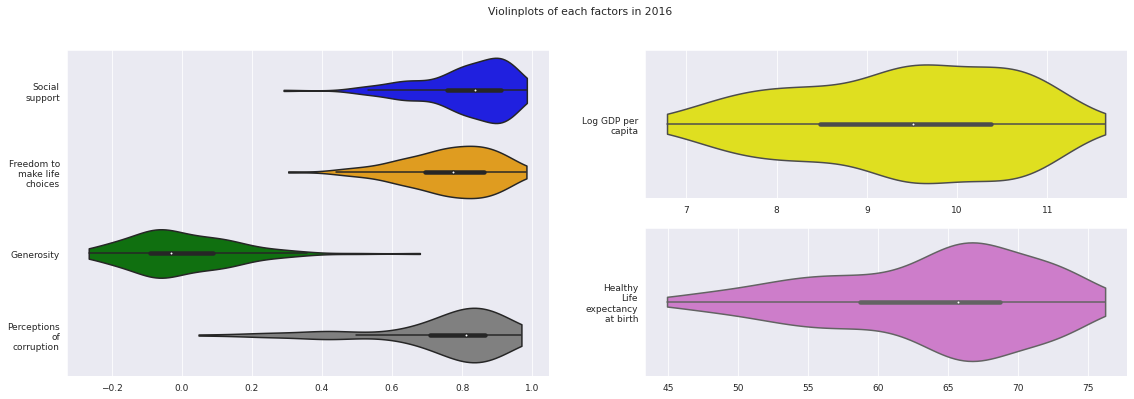

In [38]:
fig1 = plt.figure(figsize=(19, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3]
df_2016 = df[df['year'] == 2016]
labels_1 = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
labels_2 = ['Log GDP per capita']
labels_3 = ['Healthy Life expectancy at birth']
sns.violinplot(data=df_2016.loc[:,['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']],orient='h',cut=0, ax=ax1, palette=['blue','orange','green','gray'])
ax1.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_1])
sns.violinplot(data=df_2016.loc[:,['Log GDP per capita']],orient='h',cut=0, ax=ax2, palette=['yellow'])
ax2.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_2])
sns.violinplot(data=df_2016.loc[:,['Healthy life expectancy at birth']],orient='h',cut=0, ax=ax3, palette=['orchid'])
ax3.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_3])
fig1.suptitle("Violinplots of each factors in 2016")
plt.show()

The graphs above shows the distributions of the six factors: Social support, Freedom to make life choices, Generosity, Perceptions of corruption, Log GDP per capita, and Healthy life expectancy at birth in 2016. We could see that most of the values of Social support are between 0.7 and 0.98, with a median ~0.83. The distribution is left-skewed, and there’re several outliers which are smaller than the other values. For freedom to make life choices, the distribution is also left-skewed, with most of the values between 0.7 and 0.87, with a median ~0.78. The outliers are smaller than most of the values. For Generosity, the graph is right-skewed; most of the values are between -0.1 and 0.1, with a median ~-0.02, and there’re several outliers larger than other values. For the Perceptions of corruption, the graph is left-skewed and most of the values are between 0.7 and 0.88, with a median ~0.81. There are many outliers that are smaller than the other values. The graph of the Log GDP per capita is a little bit left-skewed, and most of the values are between 8.5 and 10.4, with a median ~8.5. There is no outliers for this variable, most likely because it is transformed. For Healthy life expectancy at birth, the graph is left-skewed, and most of the values are between 58 and 69, with a median ~66. There’s no outliers in this graph.

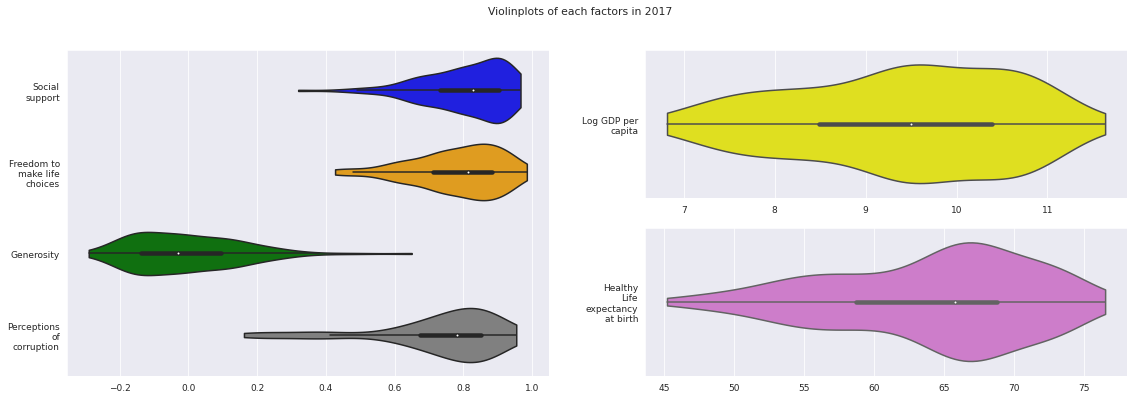

In [39]:
fig2 = plt.figure(figsize=(19, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3]
df_2017 = df[df['year'] == 2017]
sns.violinplot(data=df_2017.loc[:,['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']],orient='h',cut=0, ax=ax1, palette=['blue','orange','green','gray'])
ax1.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_1])
sns.violinplot(data=df_2017.loc[:,['Log GDP per capita']],orient='h',cut=0, ax=ax2, palette=['yellow'])
ax2.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_2])
sns.violinplot(data=df_2017.loc[:,['Healthy life expectancy at birth']],orient='h',cut=0, ax=ax3, palette=['orchid'])
ax3.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_3])
fig2.suptitle("Violinplots of each factors in 2017")
plt.show()

This shows the distribution for the 6 factors of interest in 2017. The Social support distribution remains left skewed, with the lower outlier at about 0.3. The median remains just slightly over 0.8, as it was in 2016. The shape of the life choice freedom remains left skewed, with its lower outlier having increased to above 0.4 (as it was at 0.3 in 2016). Additionally, the median has increased to being located at slightly over 0.8. For generosity, the violinplot is still right skewed, with median remaining just below 0 at about -0.05. Additionally, its outlier also remains at around 0.7 having moved only slightly more negative. While the Perception of corruption remains left skewed in the year 2017, the violinplot shows that the outlier has moved in a positive direction and now sits around 0.15. The median for this value within the year was 0.8. The Log GDP per capita remaining left skewed, the Log GDP per capita value still has a median of about 9.5 with no outliers. 


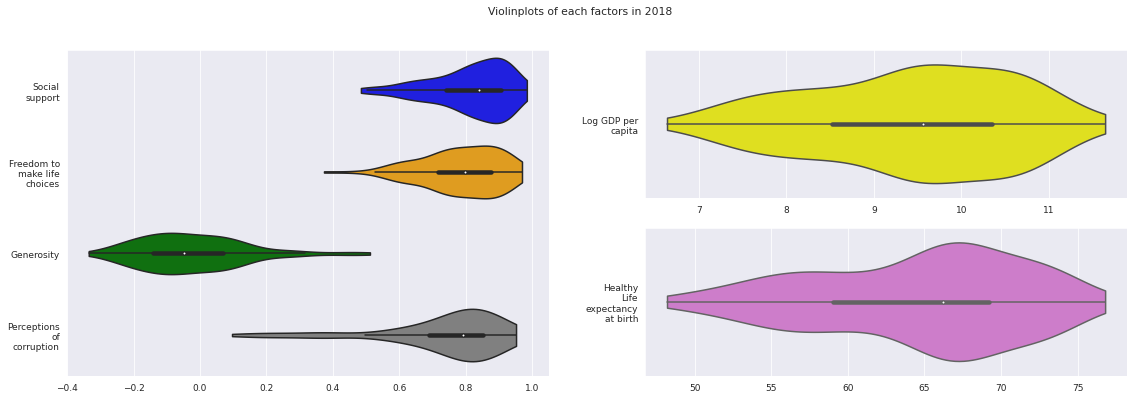

In [40]:
fig3 = plt.figure(figsize=(19, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3]
df_2018 = df[df['year'] == 2018]
sns.violinplot(data=df_2018.loc[:,['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']],orient='h',cut=0, ax=ax1, palette=['blue','orange','green','gray'])
ax1.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_1])
sns.violinplot(data=df_2018.loc[:,['Log GDP per capita']],orient='h',cut=0, ax=ax2, palette=['yellow'])
ax2.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_2])
sns.violinplot(data=df_2018.loc[:,['Healthy life expectancy at birth']],orient='h',cut=0, ax=ax3, palette=['orchid'])
ax3.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_3])
fig3.suptitle("Violinplots of each factors in 2018")
plt.show()

Social Support:

	Interquartile range (most responses are located in): [0.7, 0.9]
	Median: 0.8-0.85
	Outliers: In a small neighborhood around 0.5
	Skewness: Left skewed

Freedom to make life choices:

	Interquartile range (most responses are located in): [0.7, 0.9]
	Median: 0.8
	Outliers: [0.3,0.5]
	Skewness: Uniform, relative to other plots

Generosity:

	Interquartile range (most responses are located in): [-0.2, 0.1]
	Median: -0.1
	Outliers: [0.3,0.5]
	Skewness: Right skewed

Perceptions of corruption:

	Interquartile range (most responses are located in): [0.65, 0.85]
	Median: 0.8
	Outliers: [0.1,0.5]
	Skewness: Right skewed

Log GDP per capita:

	Interquartile range (most responses are located in): [8.5, 10.5]
	Median: 9.5
	Outliers: None
	Skewness: Uniform, relative to other plots; slightly left skewed

Healthy life expectancy at birth:

	Interquartile range (most responses are located in): [57, 70]
	Median: 67
	Outliers: None
	Skewness: Left skewed

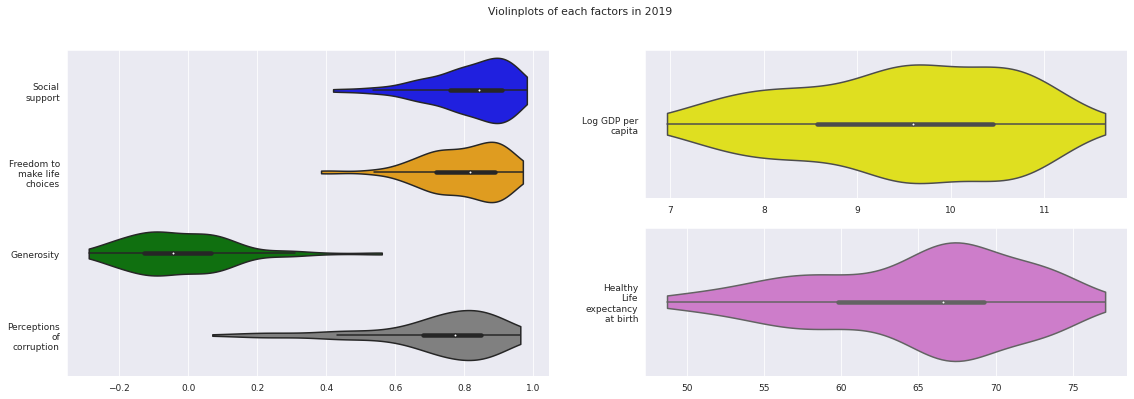

In [41]:
fig4 = plt.figure(figsize=(19, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3]
df_2019 = df[df['year'] == 2019]
sns.violinplot(data=df_2019.loc[:,['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']],orient='h',cut=0, ax=ax1, palette=['blue','orange','green','gray'])
ax1.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_1])
sns.violinplot(data=df_2019.loc[:,['Log GDP per capita']],orient='h',cut=0, ax=ax2, palette=['yellow'])
ax2.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_2])
sns.violinplot(data=df_2019.loc[:,['Healthy life expectancy at birth']],orient='h',cut=0, ax=ax3, palette=['orchid'])
ax3.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_3])
fig4.suptitle("Violinplots of each factors in 2019")
plt.show()

These violinplots show the 2019 distributions for the 6 factors of interest: Social support, Freedom to make life choices , Generosity, Perception of corruption , Log GDP per capita, and Healthy life expectancy. The distribution of the Social support ranges between around 0.4 -0.98, with a median of ~0.83. It is skewed to the left. There are some outliers causing a left skew. Similarly, the shape of Freedom to make life choices is also skewed to the left, with a median at 8.1, with a range 0.38 - 0.97. There is some outliers, that increase the spread casuing the left skewing for Social support. Generosity is skewed to the right, with a median of -0.75 ,ranging from -0.25 - 0.58. There are some outliers,causing a right skew. The distribution of Perception of corruption is skewed to the left, with a median at 0.78, and ranging from 0.7 - 0.98. There are some ouliters casuing the left skew. The distribution of Log GDP per capita slightly skewed to the to the left, with a median 9.5, ranging from 6.9- 11.7. There are no outliers. The distribution of Healthy life expectancy at birth is skewed to the left centered at 67 years, with a range 48- 78 years. There are no outliers. 



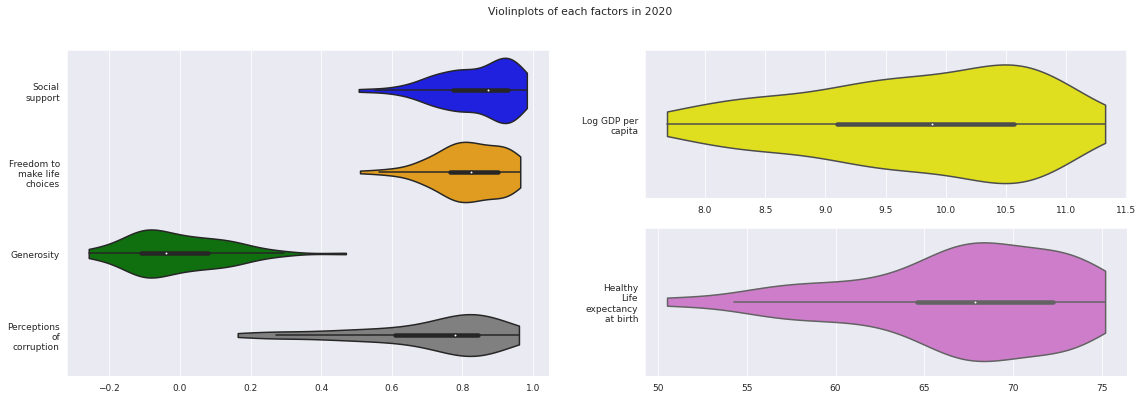

In [42]:
fig5 = plt.figure(figsize=(19, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3]
df_2020 = df[df['year'] == 2020]
sns.violinplot(data=df_2020.loc[:,['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']],orient='h',cut=0, ax=ax1, palette=['blue','orange','green','gray'])
ax1.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_1])
sns.violinplot(data=df_2020.loc[:,['Log GDP per capita']],orient='h',cut=0, ax=ax2, palette=['yellow'])
ax2.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_2])
sns.violinplot(data=df_2020.loc[:,['Healthy life expectancy at birth']],orient='h',cut=0, ax=ax3, palette=['orchid'])
ax3.set_yticklabels(labels=['\n'.join(wrap(x, 11)) for x in labels_3])
fig5.suptitle("Violinplots of each factors in 2020")
plt.show()

For Social support, Freedom to make life choices and Log GDP, the range of distribution is small comparing to other three factors'. For Generosity, Perception of corruption and Healthy life expextancy at birth,the range of distribution is more extended and the huge difference can possibly contribute to huge difference in Happiness score and there are big outliers for generosity and small ones for other two factors. For Healthy life expectancy at birth, the capacity between 50% and 75% is bigger than the one between 25% and 50% in 2020, while other years the situation swaps. All distribution except for generosity, are left-skewed, which was right-skewed.


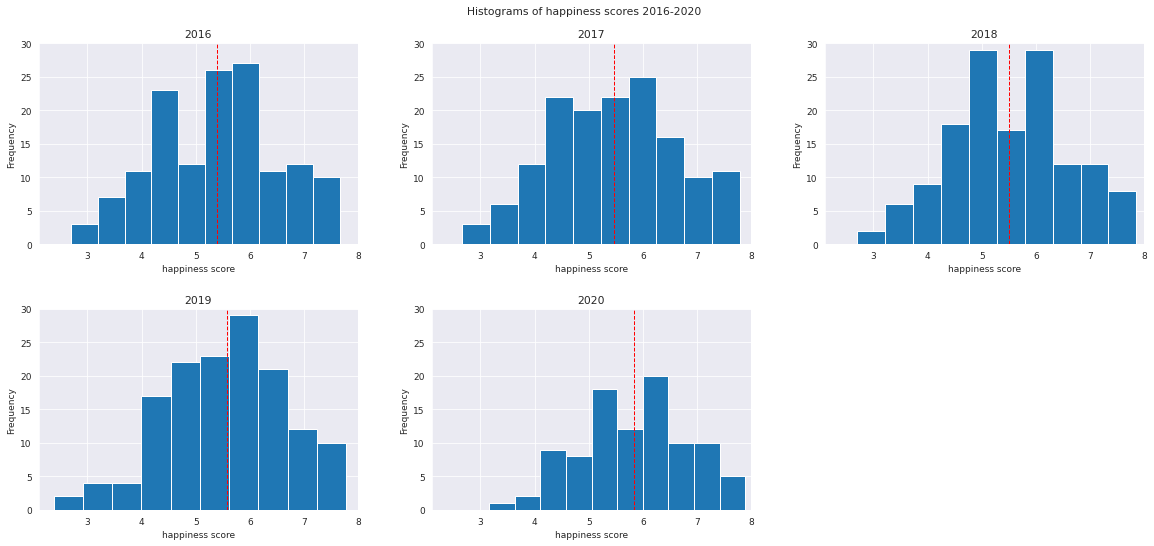

In [43]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Histograms of happiness scores 2016-2020")
df[df['year'] == 2016]['Happiness score'].plot.hist(bins=10, ax=axes[0,0])
axes[0,0].title.set_text('2016')
axes[0,0].set_xlabel('happiness score')
axes[0,0].axvline(df[df['year'] == 2016]['Happiness score'].mean(), color='r', linestyle='dashed', linewidth=1)
df[df['year'] == 2017]['Happiness score'].plot.hist(bins=10, ax=axes[0,1])
axes[0,1].title.set_text('2017')
axes[0,1].set_xlabel('happiness score')
axes[0,1].axvline(df[df['year'] == 2017]['Happiness score'].mean(), color='r', linestyle='dashed', linewidth=1)
df[df['year'] == 2018]['Happiness score'].plot.hist(bins=10, ax=axes[0,2])
axes[0,2].title.set_text('2018')
axes[0,2].set_xlabel('happiness score')
axes[0,2].axvline(df[df['year'] == 2018]['Happiness score'].mean(), color='r', linestyle='dashed', linewidth=1)
df[df['year'] == 2019]['Happiness score'].plot.hist(bins=10, ax=axes[1,0])
axes[1,0].title.set_text('2019')
axes[1,0].set_xlabel('happiness score')
axes[1,0].axvline(df[df['year'] == 2019]['Happiness score'].mean(), color='r', linestyle='dashed', linewidth=1)
df[df['year'] == 2020]['Happiness score'].plot.hist(bins=10, ax=axes[1,1])
axes[1,1].title.set_text('2020')
axes[1,1].set_xlabel('happiness score')
axes[1,1].axvline(df[df['year'] == 2020]['Happiness score'].mean(), color='r', linestyle='dashed', linewidth=1)

custom_xlim = (2.1, 8)
custom_ylim = (0, 30)
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
plt.show()

These histograms show the distributions of Happiness score in each year. 
The red lines in the graphs are the mean values. We could see that the distribution of 2016, 2018, and 2020 are bimodal. In 2016, most of the values are close to either 4.5 or 6; in 2018, most of the values are close to either 5 or 6; in 2020, the values are close to either 5.2 and 6.2. The distribution of 2017 is bell-shaped. The shape of the 2019 histogram is slightly left-skewed , with a mean Happiness score at ~5.6. There’s no outliers in the graphs. All of the values are between 2.5 and 7.9.

The means of the Happiness score are increasing over years, from 2016-2019. However, it is worth noting, that in 2020, data of ~50 countries are missing (shown in the table below), and most of the missing countries are from the "Third World". Thus we might need to take that into account when trying conducting further interpretation or analysis of this dataset.


In [44]:
# We could see that there are ~50 missing values in year 2020
df.groupby('year').count()

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
year,,,,,,,,
2016,142,142,139,142,137,140,138,131
2017,147,147,146,146,143,146,145,137
2018,142,142,136,142,138,141,136,134
2019,144,144,138,144,139,143,137,136
2020,95,95,88,95,92,94,88,89


### Checking relationships between factors by scatterplots

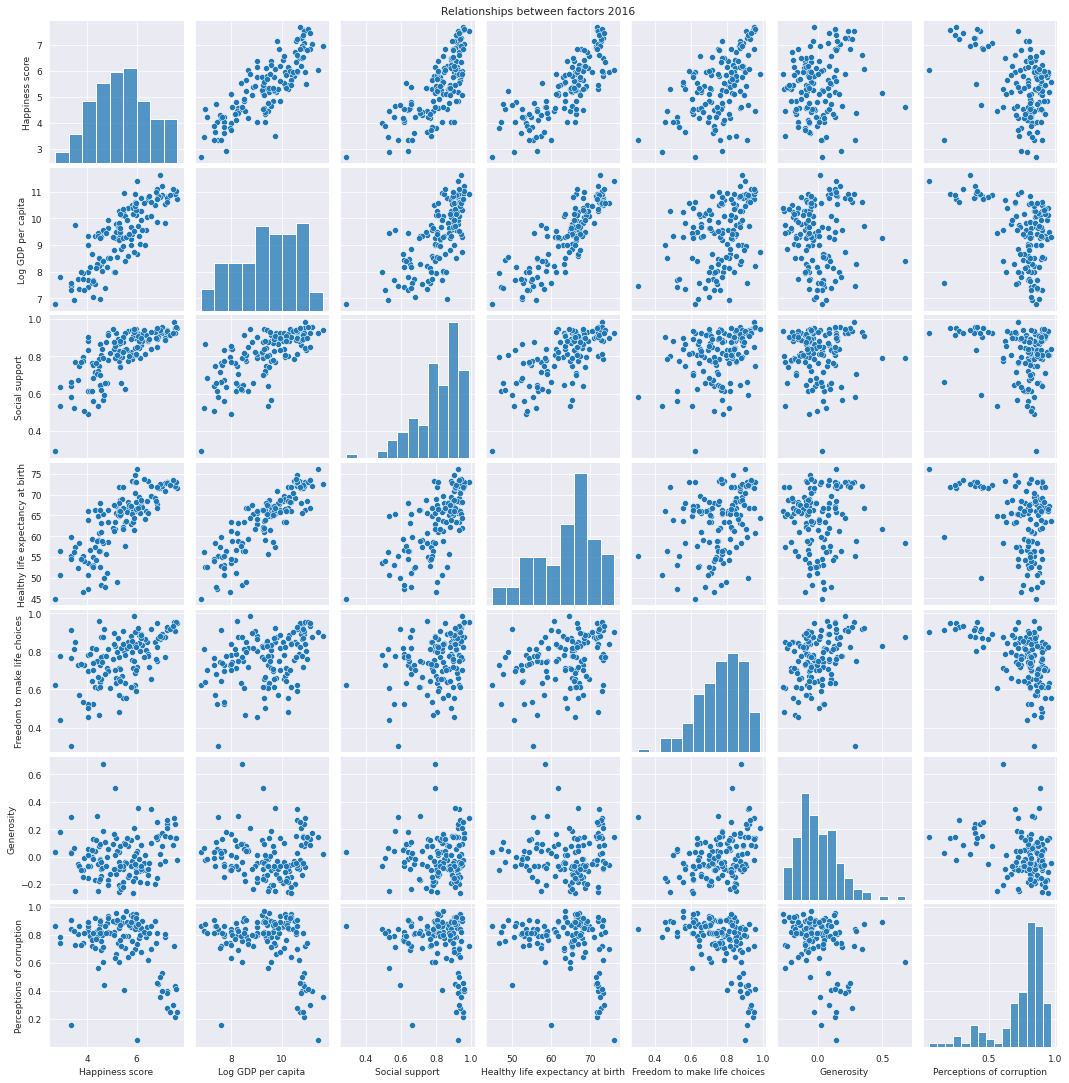

In [45]:
df_pair_2016 = df[df['year'] == 2016].drop(['Country name', 'year'], 1)
pair = sns.pairplot(df_pair_2016 ,kind='scatter')
pair.fig.set_size_inches(15,15)
pair.fig.suptitle("Relationships between factors 2016", y=1)
plt.show()

In the year 2016, Happiness scores are positively correlated with Log GDP per capita, Social support, life expectancy and Dreedom to make life choices. There is no correlation between Happiness scores and Generosity. And the last factor, Perception of corruption is negatively correlated with the Happiness score. 

Log GDP per capita is correlates positively with Happiness score, Social support, and h=Healthy life expectancy at birth. There is a slight positive correlation between Log GDP per capita and Freedom of choice, and a slight negative correlation between  Log GDP per capita and the perception of corruption. There is no correlation between log GDP and Generosity.  

Social support shows a positive correlation with the Happiness score, Log GDP and Healthy life expectancy. In contrast, Social support correlates negatively with the Perception of corruption. The Social support factor does not correlate with Freedom of choice or Generosity. 

Healthy life expectancy correlates positively with the three factors, Happiness score, Log GDP, and Social support, but is only slightly positively correlated with Freedom of choice. There seems to be no visible link between Life expectancy and Generosity, while it is slightly negatively correlated with the Perception of corruption. 

Freedom to make life choices positively correlates with  Happiness score, Log GDP per capita, and slightly positively with Social support, Life expectancy at birth, and Generosity. The correlation between Freedom of choice and perception of corruption is negative. 

Generosity experiences no correlation with Happiness, GDP per capita, Social support, and Healthy life expectancy. There is a positive corelation between Generosity and Freedom of choice, while there is only a slight negative correlation with Perception of corruption.  

The Perception of corruption shows a negative correlation with the Happiness score, Log GDP per capita, Social support, and Freedom to make life choices. There is a slight negative correlation between Perception of corruption and Generosity.  


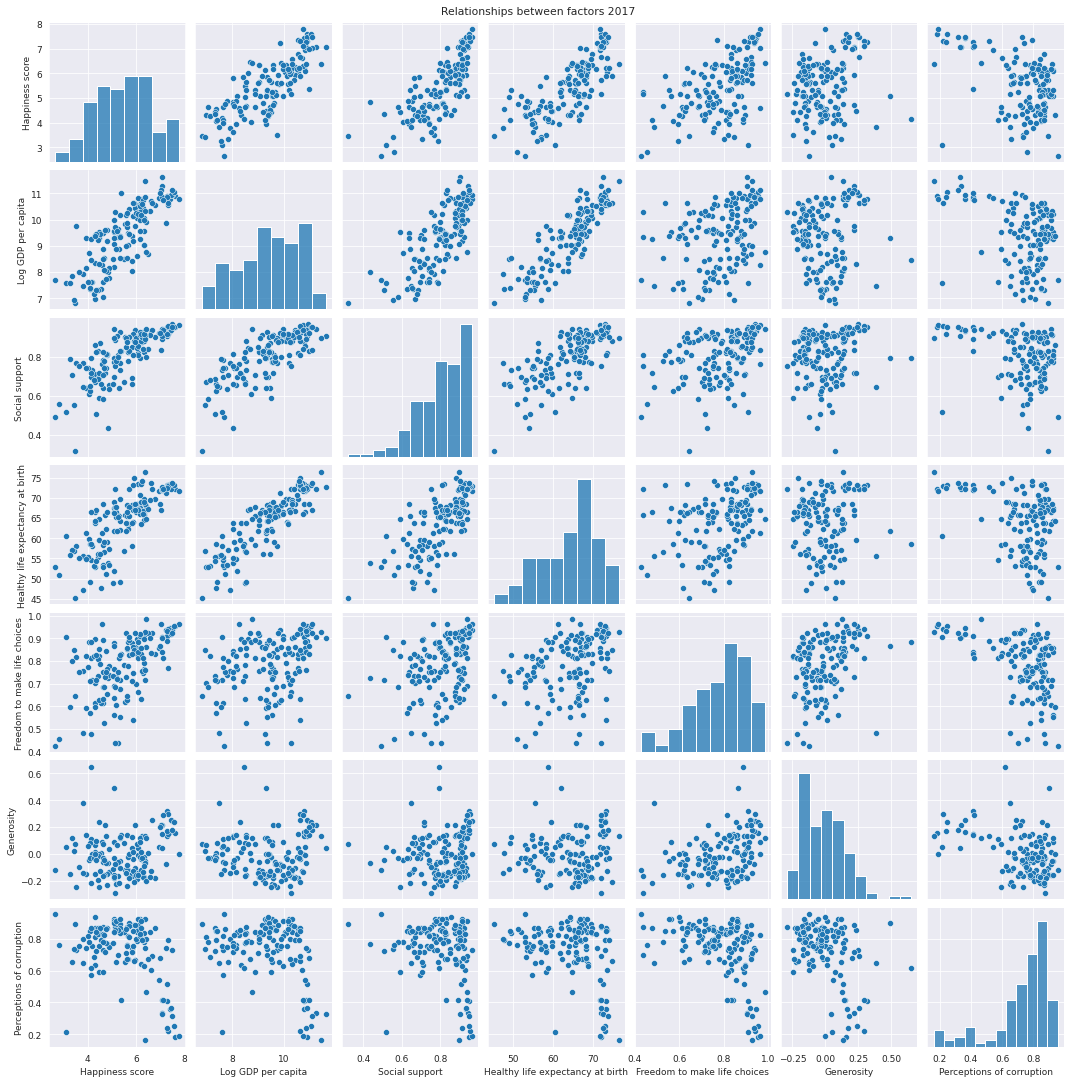

In [46]:
df_pair_2017 = df[df['year'] == 2017].drop(['Country name', 'year'], 1)
pair = sns.pairplot(df_pair_2017 ,kind='scatter')
pair.fig.set_size_inches(15,15)
pair.fig.suptitle("Relationships between factors 2017", y=1)
plt.show()

The Happiness Scores are positively correlated with Log GDP per Capita, Social Support, Healthy Life Expectancy at Birth, and Freedom To Make Life Choices. We see a negative correlation with Perceptions of Corruptness and no correlation with Generosity.

Log GDP per Capita is not correlated to Generosity, but is negatively correlated to Perceptions of Corruptness. It's positively correlated to Happiness Scores, Social Support, Healthy Life Expectancy at Birth, and Freedom To Make Life Choices.

Social Support is negatively correlated with Perceptions of Corruptness, but is somewhat positively correlated to Generosity. It's positively correlated with Freedom To Make Life Choices, Healthy Life Expectancy at Birth, Log GDP per Capita, and Happiness Scores.

Healthy Life Expectancy at Birth is negatively correlated to Perceptions of Corruption, but has no correlation with Generosity. It's positively correlated with Happiness Scores, Log GDP per Capita, Social Support, and Freedom To Make Life Choices.

Freedom To Make Life Choices is negatively correlated with Perceptions of Corruption, but is somewhat positively correlated with Generosity. It's positively correlated with Healthy Life Expectancy at Birth, Social Support, Log GDP per Capita, and Happiness Scores.

Generosity is negatively correlated with Perceptions of Corruption, Social Support, Log GDP per Capita, and Happiness Scores; positively correlated with Freedom To Make Life Choices, and not correlated with Healthy Life Expectancy at Birth.

Perceptions of Corruption is not correlated with Generosity, and is negatively correlated with Healthy Life Expectancy at Birth, Freedom To Make Life Choices, Social Support, Log GDP per Capita, and Happiness Scores.

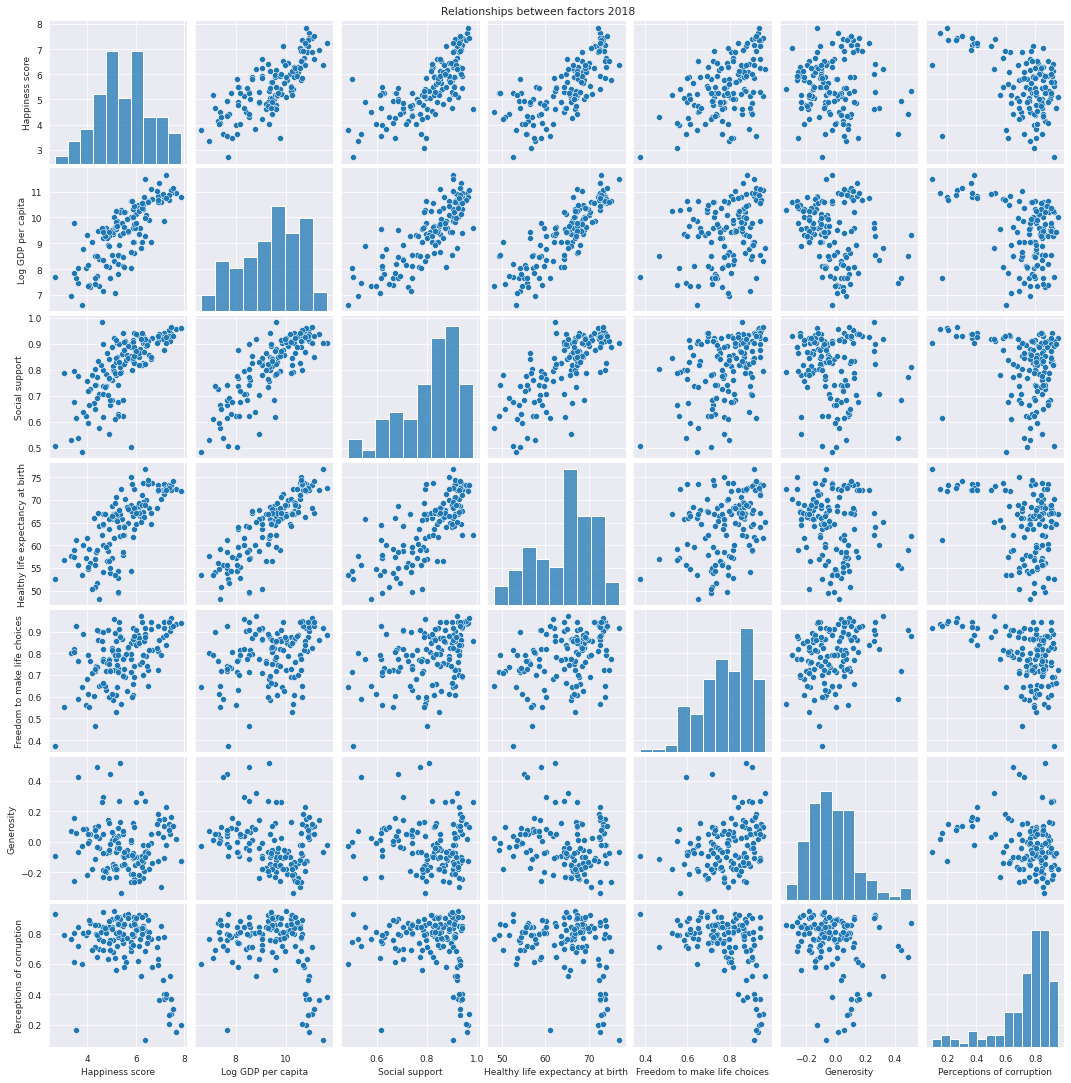

In [47]:
df_pair_2018 = df[df['year'] == 2018].drop(['Country name', 'year'], 1)
pair = sns.pairplot(df_pair_2018 ,kind='scatter')
pair.fig.set_size_inches(15,15)
pair.fig.suptitle("Relationships between factors 2018", y=1)
plt.show()

In 2018, happiness scores are positively correlated with Log GDP per capita, Social support, Life expectancy and Freedom to make life choices. There is no correlation between Happiness score and Generosity. Perception of corruption is negatively correlated with the Happiness score.

Log GDP per capita is correlates positively with Happiness score, Social support, and Healthy life expectancy at birth. We couldn’t see any correlation between Log GDP per capita and Freedom to make life choices Generosity. There is a slight negative correlation between Log GDP capita and Perceptions of corruption.

Social support shows a positive correlation with the Happiness score, Log GDP, Healthy life expectancy, and Freedom. In contrast, Social support correlates negatively with the Perception of corruption. The Social support factor does not correlate with Freedom of choice or generosity.

Healthy life expectancy correlates positively with Happiness score, Log GDP, and Social support. There seems to be no visible link between  Healthy life expectancy and Freedom/Generosity, while it is slightly negatively correlated with the Perception of corruption.

Freedom to make life choices positively correlates with Happiness score. The correlation between Freedom of choice and Perception of corruption is negative. For  Log GDP per capita, Social support, Healthy life expectancy and Generosity, there’s no correlation between freedom and them respectively.

Generosity experiences no correlation with happiness score and Log GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices. There is a slight negative correlation between Generosity and Perception of corruption.

The Perception of corruption shows negative correlation with generosity, while for all of the other variables, the correlation between perception of corruption and them are negative.

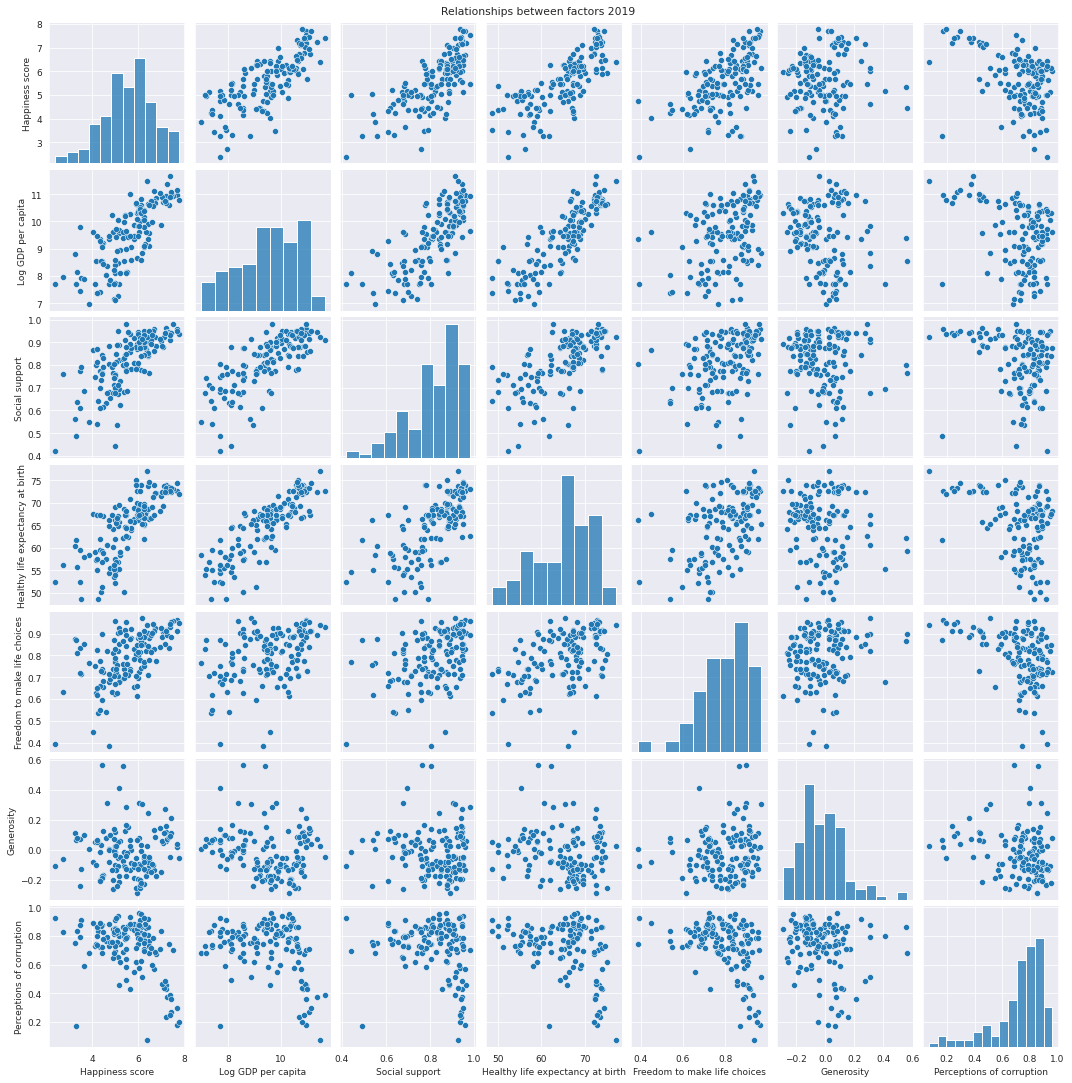

In [48]:
df_pair_2019 = df[df['year'] == 2019].drop(['Country name', 'year'], 1)
pair = sns.pairplot(df_pair_2019 ,kind='scatter')
pair.fig.set_size_inches(15,15)
pair.fig.suptitle("Relationships between factors 2019", y=1)
plt.show()

When looking at the set of 2019 pairplots for we can see that when, Happiness score is on the y-axis and plotted against Log GDP per capita, Social support, Healthy life expectancy at birth and Freedom to make Life Choices, there is a strong positive correlation. However, when Happiness Score on the y-axis is plotted against Generosity, there is no correlational relationship that can be observed, and there is a negative relationship between Perception of corruption and Happiness score. 

When Log GDP per capita is on the y-axis, and plotted against Happiness score, Social support, Healthy Life expectancy at birth and Freedom to make Life Choices, there is a strong positive correlation. There is no relationship between Generosity and Log GDP per capita and there is a negative relationship between Perception of corruption and Log GDP per capita.

When Social support is plotted on the y-axis against Happiness score, Social support, Healthy life expectancy at birth and Freedom to make life choices, there is a positive correlation, however there is no correlation between Generosity and Social support, and there is a negative relationship between Perceptions of corruption and and Social support.
 
When Healthy Life Expectancy at Birth is plotted on the y-axis against Happiness score, Log GDP per capita Social support, and Freedom to make life choices, there is a positive correlation. There is no relationship between Generosity and Healthy life expectancy at birth and there is a negative relationship between Perceptions of corruptions and Healthy life Expectancy at birth.

When Freedom to make life choices is on the y-axis plotted against, Happiness score, Log GDP per capita, Social support and Healthy life expectancy at birth , there is a positive relationship. There is no relationship between Generosity and Freedom to make life choices, and there is a negative relationship between Perceptions of corruption and Freedom to make life choices. 
 
When Generosity is on the y-axis plotted against, Happiness score, Log GDP per Capita, Social support, Healthy life expectancy at birth and Freedom to make life choices there is no relationship.When Generosity is plotted against Perceptions of corruption there is a negative relationship.
 
When Perceptions of corruption is on the y-axis, when plotted against Happiness score, Log GDP per capita, Social support, Healthy life expectancy at birth and Freedom to make life choices and Generosity there is a negative relationship.  


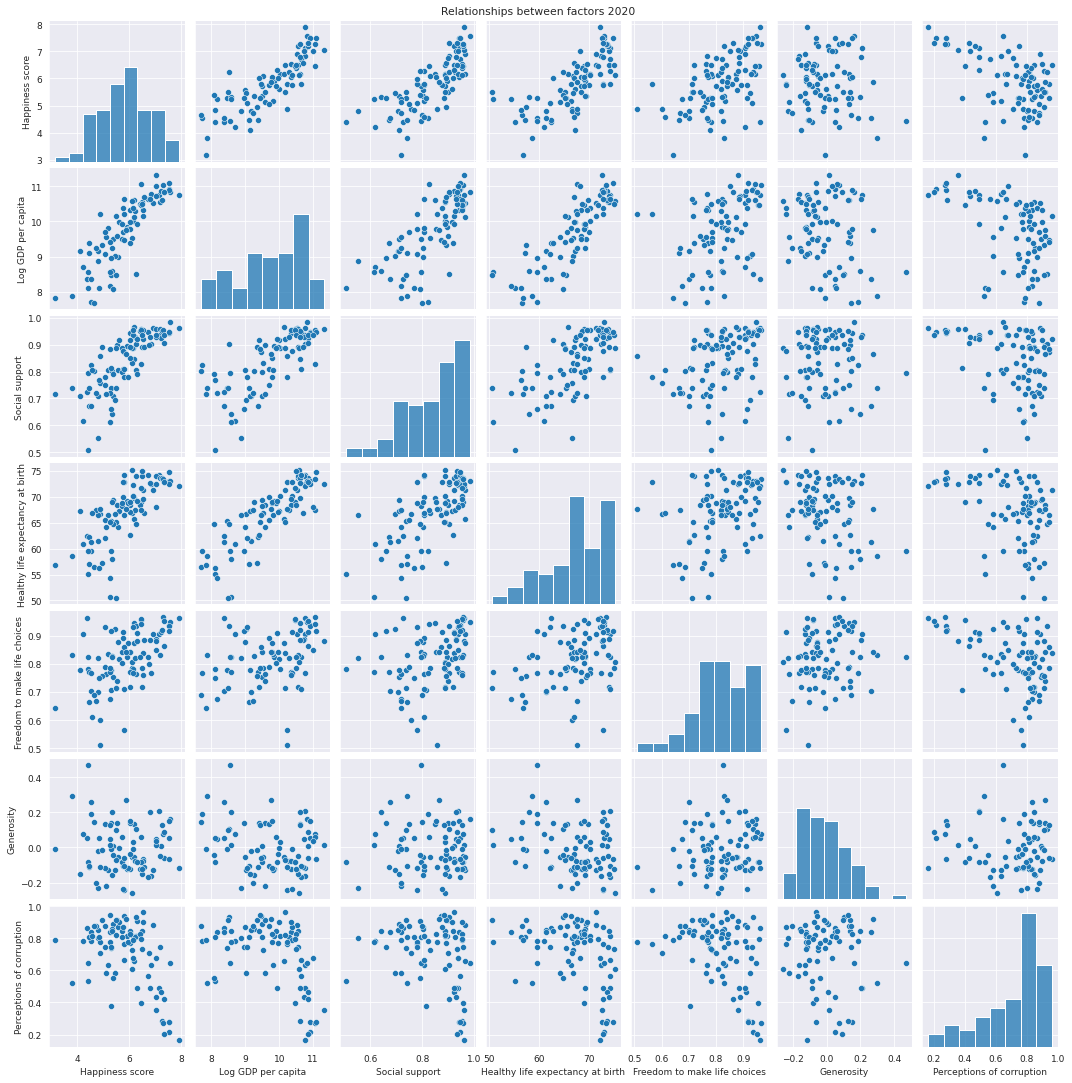

In [49]:
df_pair_2020 = df[df['year'] == 2020].drop(['Country name', 'year'], 1)
pair = sns.pairplot(df_pair_2020 ,kind='scatter')
pair.fig.set_size_inches(15,15)
pair.fig.suptitle("Relationships between factors 2020", y=1)
plt.show()

Here we can find relationship between seven factors including six factors we are considering and Happiness score itself, in 2020. 
Set happiness score as x-axis, it has strong positive correlation with Log GDP per capita, Social support and Healthy life expectancy at birth and weak positive correlation with Freedom to make life choices, weak negative correlation with Perception of corruption.
Set Log GDP per capita as x-axis, it has strong positive correlation with Social support and Healthy life expectancy at birth. The Perception of corruption starts to drop as Log GDP approaches some point, which represents a weak negative correlation.
Set Social support as x-axis, it has strong positive correlation with Healthy expectancy, and weak negative correltion with Perception of corruption.
Set Healthy expectancy as x-axis, it has weak positive correlation with Freedom to make choices and weak negative correlation with Generosity and Perception of corruption. 
Set Freedom to make life choices as x-axis, it has weak negative correlation with perception of corruption and the distribution is more equally spaced than other factors. 

**EDA Summary: Overall we learned that over the years of 2016- 2020 there was consistently a negative correlation between perceptions of corruption and 
and all other factors. When Generosity was plotted against all other factors there was either a slighly positive correlation in some years or no relation with the other factors. Other than these instances all other factors are postively correlated with each other in the years of 2016-2020**


## Analysis

### Linear Regression

We want to explore the correlations between happiness score and other factors. We first utilize linear regression. From the pairplots we generated in the EDA section, we could observe linear relationship between happiness score and some of the factors. Here, we want to use linear regression to further confirm and quantify the linear relationships by getting the slopes. By learning the slope, we could know which factor has the strongest relationship with happiness score. We could also learn how the relationship changed over time by observing the changes of slopes. We can also look into the p-values to figure out whether the results are statistically significant. We set the level of significance at 0.01.

In [50]:
def linear_regression(df, variable):
  lr_df = df[[variable, 'Happiness score']].dropna()
  x = lr_df[variable]
  y = lr_df['Happiness score']
  slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
  return x, y, slope, intercept, p_value

def plot_linear_regression(ax1, ax2, df, year, variable):
  x, y, slope, intercept, p_value = linear_regression(df, variable)
  axes[ax1,ax2].scatter(x, y)
  axes[ax1,ax2].plot(x, intercept + slope*x, 'r')
  axes[ax1,ax2].title.set_text(year)
  axes[ax1,ax2].set_xlabel(variable)
  axes[ax1,ax2].set_ylabel('Happiness score')
  return slope, p_value

In [51]:
def linear_regression_analysis(variable):
  slope1, pval1 = plot_linear_regression(0, 0, df_pair_2016, '2016', variable)
  slope2, pval2 = plot_linear_regression(0, 1, df_pair_2017, '2017', variable)
  slope3, pval3 = plot_linear_regression(0, 2, df_pair_2018, '2018', variable)
  slope4, pval4 = plot_linear_regression(1, 0, df_pair_2019, '2019', variable)
  slope5, pval5 = plot_linear_regression(1, 1, df_pair_2020, '2020', variable)
  plt.show()

  print("slopes of linear regression between {} and happiness score: ".format(variable))
  print("2016: " + str(slope1))
  print("2017: " + str(slope2))
  print("2018: " + str(slope3))
  print("2019: " + str(slope4))
  print("2020: " + str(slope5))
  print()
  print("p-values of linear regression between {} and happiness score: ".format(variable))
  print("2016: " + str(pval1))
  print("2017: " + str(pval2))
  print("2018: " + str(pval3))
  print("2019: " + str(pval4))
  print("2020: " + str(pval5))

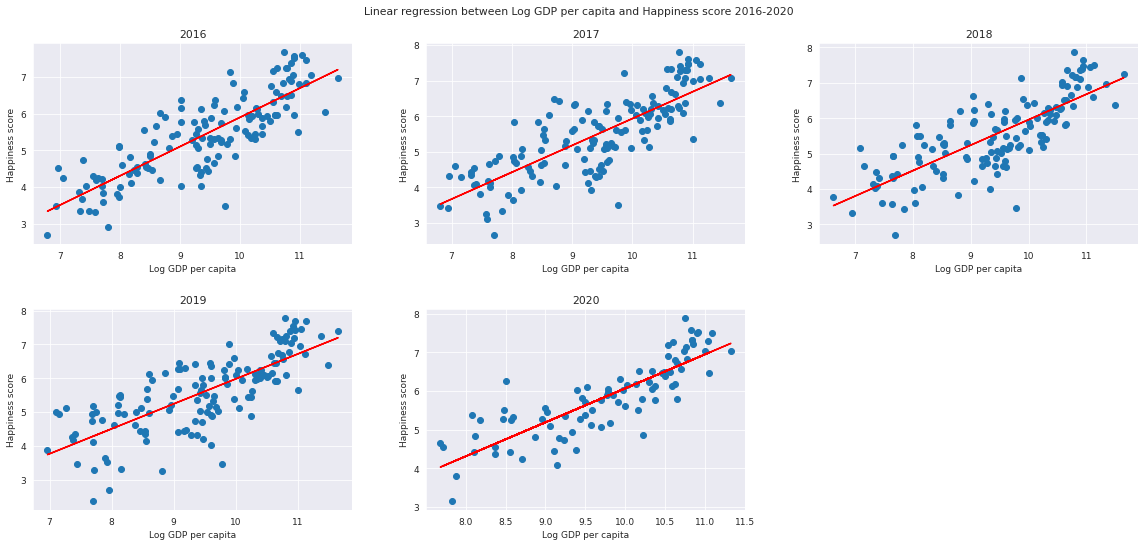

slopes of linear regression between Log GDP per capita and happiness score: 
2016: 0.7925228633387019
2017: 0.7531010487429438
2018: 0.7214275485779883
2019: 0.7377386044704254
2020: 0.8798916724825663

p-values of linear regression between Log GDP per capita and happiness score: 
2016: 3.57351770560029e-36
2017: 1.2771449090353922e-32
2018: 4.7304496873570396e-29
2019: 1.900409049072841e-26
2020: 8.635919636906486e-25


In [52]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Log GDP per capita and Happiness score 2016-2020")
linear_regression_analysis('Log GDP per capita')

These are scatterplots from 2016-2020 where we want to observe if change in Log GDP per capita overtime can predict Happiness Score. There is a strong positive correlation between these factors for all years and this relationship is statistically significant because the p-vlaues for all years are below 0.01 indicating that there is  Log GDP per capita is an indicator for Happiness Score. Overtime between 2016 - 2020 the slope the regression of  of Log GDP  and  Happiness started to go down  after 2016 , then increase at its peak at 2020 at ~.88. This may be because the 2020 dataset includes less countries thus the data from the missing countries cause the overall trend to change. Since the missing data is mainly from countries in the “Third World,” which have lower GDP, this may have caused the slope of Log GDP per capita to increase. 

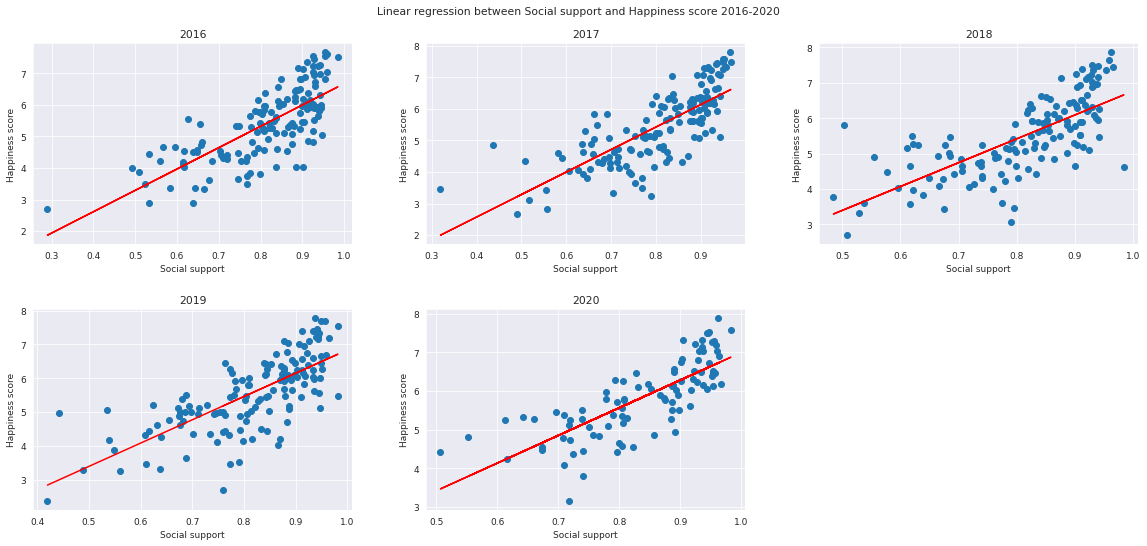

slopes of linear regression between Social support and happiness score: 
2016: 6.763838463996946
2017: 7.133768777023693
2018: 6.736293086451522
2019: 6.891539537370684
2020: 7.151509127402142

p-values of linear regression between Social support and happiness score: 
2016: 4.339549680661936e-26
2017: 6.481912537106663e-29
2018: 1.5586440351280106e-23
2019: 3.27539029338266e-25
2020: 4.8877664902165315e-20


In [53]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Social support and Happiness score 2016-2020")
linear_regression_analysis('Social support')

These scatterplots show data and regressions on social support vs the happiness scores, spanning 2016-2020. The regression analysis tells us that there is generally a strong positive correlation between social support and happiness scores. This is confirmed by the very small p-values we got. Social support is an indicator of happiness scores. Over the years recorded, the slope of the linear regression stayed essentially the same, indicating a consistent positive correlation; however, the p-values were wildly different. Social Support was _most_ significant in 2018, and least significant (still statistically significant) in 2017.

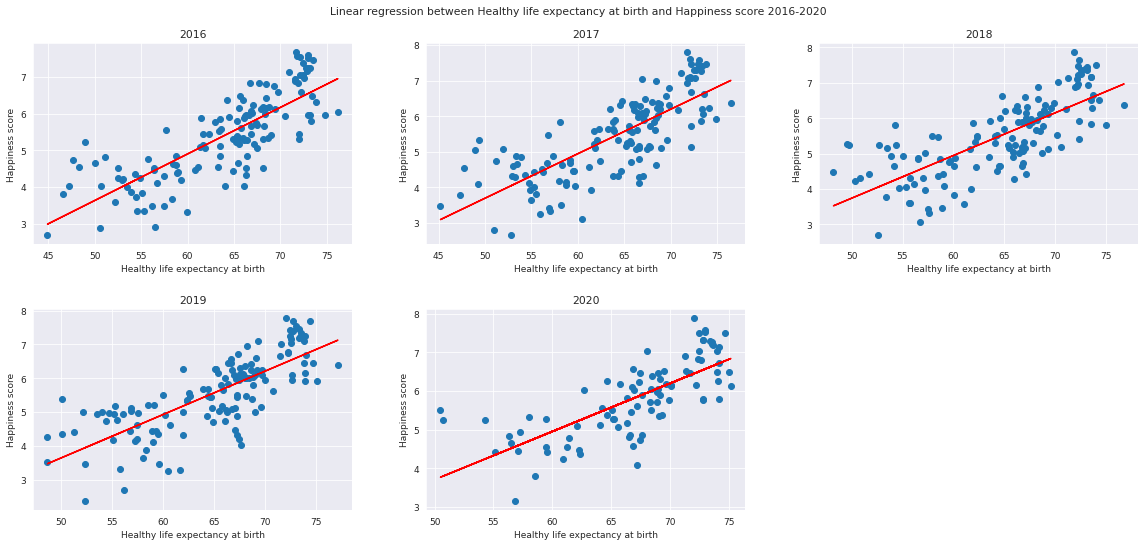

slopes of linear regression between Healthy life expectancy at birth and happiness score: 
2016: 0.12639132115010843
2017: 0.12474987908408043
2018: 0.1203405919691269
2019: 0.12869223142373
2020: 0.12442055695961347

p-values of linear regression between Healthy life expectancy at birth and happiness score: 
2016: 1.610856241409933e-31
2017: 4.253651610675857e-29
2018: 7.969220044570502e-26
2019: 1.1431399980584132e-27
2020: 6.237417938464052e-17


In [54]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Healthy life expectancy at birth and Happiness score 2016-2020")
linear_regression_analysis('Healthy life expectancy at birth')

We also fitted a linear regression on healthy life expectancy at birth in each year between 2016 and 2020. We could see that the slopes are about the same for each year, with a value ~0.12, which means that the correlation between healthy life expectancy and happiness score didn’t change much over years. When we looking into the p-values, we could see that the p-values are really close to zero. Therefore, the result is significant and there’s likely to be a weak positive linear correlation between healthy life expectancy and happiness score.

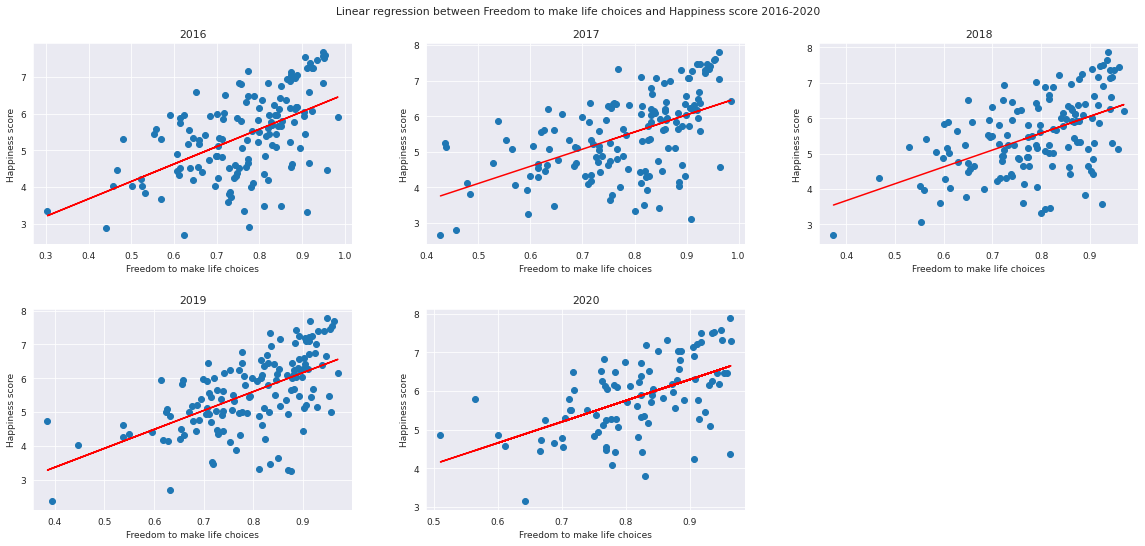

slopes of linear regression between Freedom to make life choices and happiness score: 
2016: 4.738031371089743
2017: 4.807076561317715
2018: 4.76023187209903
2019: 5.598248239896584
2020: 5.474055183894521

p-values of linear regression between Freedom to make life choices and happiness score: 
2016: 1.830642124792811e-11
2017: 3.550345685507596e-12
2018: 6.942499316893005e-11
2019: 1.4563148401771385e-14
2020: 1.757690221508967e-08


In [55]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Freedom to make life choices and Happiness score 2016-2020")
linear_regression_analysis('Freedom to make life choices')

Generally, freedom to make life choices has a strong positive correlation to happiness score and this pattern happens in each year we are considering and the correlation reaches the strongest in 2019. In further, we can see the p-value is pretty small for each year, which means the occurance of "freedom to make life choices has a strong positive correlation to happiness score " is common and stable. This phenomenon represents that people feel happier if they have more freedom to make choices.

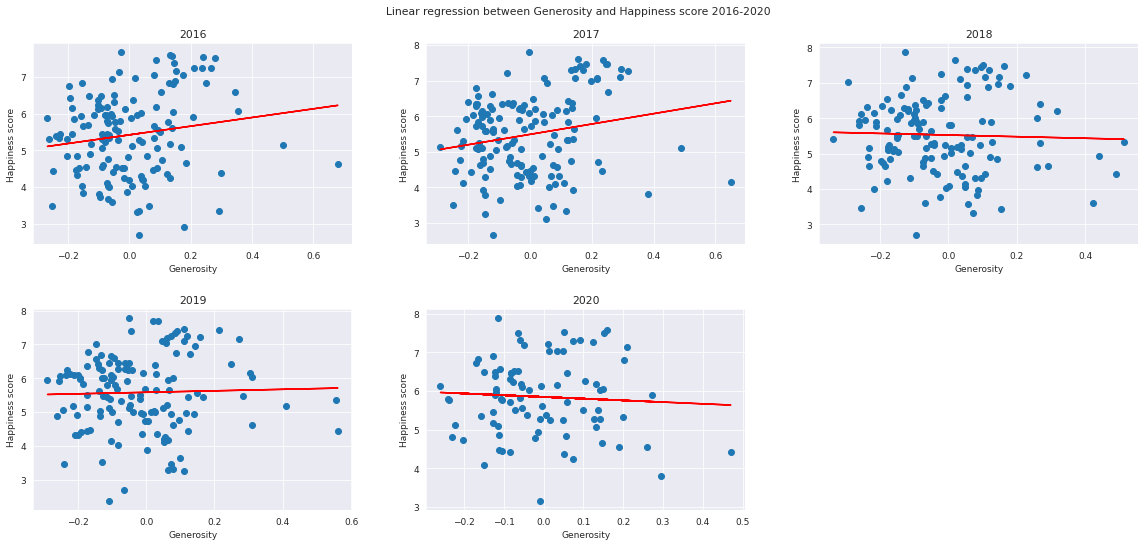

slopes of linear regression between Generosity and happiness score: 
2016: 1.180859229003987
2017: 1.4521796093453494
2018: -0.2284861695061452
2019: 0.22083412442503692
2020: -0.4463292332267246

p-values of linear regression between Generosity and happiness score: 
2016: 0.0595634780558926
2017: 0.014029210323492008
2018: 0.6938078280532907
2019: 0.722802555591918
2020: 0.568673416834684


In [56]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Generosity and Happiness score 2016-2020")
linear_regression_analysis('Generosity')

These scatterplots show data and regressions on generosity vs happiness scores, spanning 2016-2020. The slopes calculated from the regression analysis indicate that there is generally no or very little correlation between generosity (of the government) and happiness scores. The p-values are _not_ all very small, which confirms that generosity is not a good indicator of happiness scores.

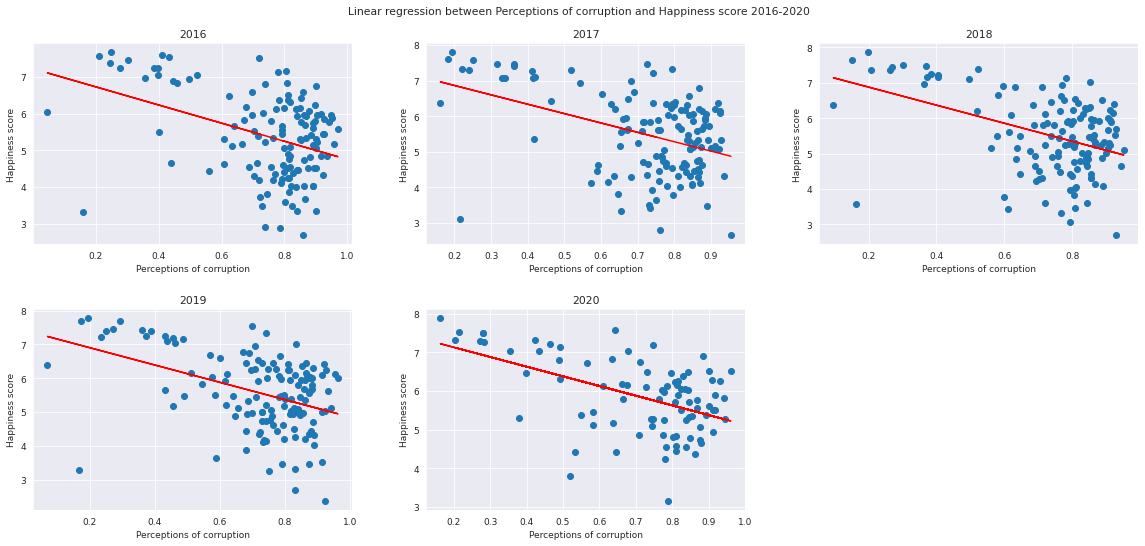

slopes of linear regression between Perceptions of corruption and happiness score: 
2016: -2.468801874761856
2017: -2.630209054495516
2018: -2.5510725080126595
2019: -2.5591389021626547
2020: -2.5057890648045476

p-values of linear regression between Perceptions of corruption and happiness score: 
2016: 2.3861093203784067e-06
2017: 2.701730333213685e-07
2018: 2.0557903371321988e-07
2019: 2.5110454549685967e-07
2020: 3.164331225106604e-07


In [57]:
fig, axes = plt.subplots(2,3, figsize=(17,8))
fig.delaxes(axes[1,2]) 
fig.tight_layout(pad=5.0)
fig.suptitle("Linear regression between Perceptions of corruption and Happiness score 2016-2020")
linear_regression_analysis('Perceptions of corruption')

The perception of corruption has a weak negative correlation to the overall happiness score. Generally, this correlation remains largely the same over the course of the years we analyzed, aside from increases in the overall quantity of countries who have a high perception of corruption. This indicates that over the course of the years 2016-2020, there is a slight decrease in the happiness of a country as its citizens feel there is greater national corruption. 

### Linear Mixed Effects Model

After exploring the relationship between happiness score and the factors respectively by using linear regression, we now want to learn how those factors affect happiness score jointly in order to gain a more comprehensive understanding of the factors that correlate with happiness score. Here, we use linear mixed effects model. Unlike multiple linear regression, which assumes that the independent variables are not highly correlated with each other, linear mixed effects model explicitly accounts for any statistical dependencies in the data. From the EDA section, we could see that there are correlations between independent variables (eg. GDP per capita and Healthy life expectancy at birth), so we choose to use linear mixed effects model. This model will give us the coefficient and p-value of each independent variable while taking the effect of other variables into account. From the coefficient we could know whether a factor is correlated with happiness score, and from p-value we could know whether the result is significant. We set the level of significance at 0.01.

In [58]:
df_new_names = df.copy()
df_new_names.columns = ['Country_name','year','Happiness_score','Log_GDP_per_capita','Social_support','Healthy_life_expectancy_at_birth',
                        'Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
df_new_names = df_new_names.dropna()
df_new_names_2016 = df_new_names[df_new_names['year'] == 2016]
df_new_names_2017 = df_new_names[df_new_names['year'] == 2017]
df_new_names_2018 = df_new_names[df_new_names['year'] == 2018]
df_new_names_2019 = df_new_names[df_new_names['year'] == 2019]
df_new_names_2020 = df_new_names[df_new_names['year'] == 2020]

**ALL YEARS MLM RESULTS (2016 -2020)**

In [59]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names, groups=df_new_names["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       589         Method:                 REML           
No. Groups:             138         Scale:                  0.0736         
Min. group size:        1           Log-Likelihood:         -258.0632      
Max. group size:        5           Converged:              Yes            
Mean group size:        4.3                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -2.435    0.479 -5.084 0.000 -3.374 -1.497
Log_GDP_per_capita                0.290    0.073  4.002 0.000  0.148  0.432
Generosity                        0.606    0.186  3.249 0.001  0.240  0.971
Social_support                 

After performing an MLM regression analysis on the data for all years, we see there are two large coefficients for social support and freedom to make life choices. This means that these two factors are strongly correlated with happiness score. There also are two smaller coefficients, log GDP per capita and generosity, which means that these two factors are weakly correlated with happiness score. For perceptions of corruptions, the coefficient is negative, so this factor is negatively correlated with happiness score. The coefficient of healthy life expecancy is close to zero, so there's likely to be no correlation between healthy life expectancy and happiness score. Furthermore, we can see from p-values that all factors' p-values are pretty low. Therefore we can conclude that social support and freedom to make life choices are playing important positive role to improve happiness while perception of corruption is doing the opposite.

**2016 MLM RESULTS**

In [60]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names_2016, groups=df_new_names_2016["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       124         Method:                 REML           
No. Groups:             124         Scale:                  0.1517         
Min. group size:        1           Log-Likelihood:         -106.1148      
Max. group size:        1           Converged:              Yes            
Mean group size:        1.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -3.189    0.682 -4.678 0.000 -4.526 -1.853
Log_GDP_per_capita                0.404    0.094  4.291 0.000  0.219  0.588
Generosity                        0.661    0.341  1.938 0.053 -0.008  1.330
Social_support                 

After performing an MLM regression analysis on the data from 2016, we see that the fields with the largest coefficients and smallest p-values are "Social support" and "Freedom to make life choices". This indicates that they are the most statistically significant fields that contribute to a happiness score. Using a p-value threshold of .01, the other statistically significant field is Log GDP per capita, which positively contributes to happiness scores. The remaining fields are not statistically significant as their p-values are greater than the chosen threshold.

**2017 MLM RESULTS**

In [61]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names_2017, groups=df_new_names_2017["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       132         Method:                 REML           
No. Groups:             132         Scale:                  0.1675         
Min. group size:        1           Log-Likelihood:         -118.9326      
Max. group size:        1           Converged:              Yes            
Mean group size:        1.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -2.118    0.684 -3.096 0.002 -3.458 -0.777
Log_GDP_per_capita                0.303    0.073  4.161 0.000  0.160  0.446
Generosity                        0.281    0.360  0.781 0.435 -0.425  0.987
Social_support                 

In 2017, after considering the correlations between independent variables, we could see that there are positive relationships between log GDP per capita, social support, freedom to make life choices and happiness score respectively. Among these three factors, social support has the strongest correlation with happiness score, with a coefficient ~2.64. The positive correlation between Freedom to make life choices is also pretty obvious, with a coefficient ~1.47. The correlation between GDP and happiness score is weaker, with a coefficient ~0.3. The p-values of these three variables are close to zero, which indicates that the results are statistically significant. From the result, we could see a ~0.28 coefficient between generosity and happiness score, but the p-value is large, so the result is likely happened by random chance. Similarly, the p-value of perception of corruption is also larger than 0.01, so the result is not statistically significant. Lastly, when we look into healthy life expectancy, we found the the coefficient is really close to zero, so there’s no correlation between healthy life expectancy and happiness score.

**2018 MLM RESULTS**

In [62]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names_2018, groups=df_new_names_2018["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       126         Method:                 REML           
No. Groups:             126         Scale:                  0.1647         
Min. group size:        1           Log-Likelihood:         -112.2756      
Max. group size:        1           Converged:              Yes            
Mean group size:        1.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -1.638    0.740 -2.213 0.027 -3.088 -0.188
Log_GDP_per_capita                0.345    0.110  3.144 0.002  0.130  0.560
Generosity                        0.347    0.373  0.929 0.353 -0.385  1.078
Social_support                 

After performing an MLM regression analysis on the data from 2018, the fields with the largest coefficients are Freedom of Choice and Social Support, while the smallest p-values are LOG GDP per Capita and Social Support. This means that these are the most  significant fields that contribute to a happiness score. With a p-value threshold of .01, the most significant fields LOG GDP and and social support for the year of 2018. For this year, the remaining fields are not statistically significant as their p-values are greater than our proposed threshold.

**2019 MLM RESULTS**

In [63]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names_2019, groups=df_new_names_2019["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       126         Method:                 REML           
No. Groups:             126         Scale:                  0.1735         
Min. group size:        1           Log-Likelihood:         -115.5352      
Max. group size:        1           Converged:              Yes            
Mean group size:        1.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -2.240    0.744 -3.008 0.003 -3.699 -0.781
Log_GDP_per_capita                0.125    0.090  1.386 0.166 -0.052  0.303
Generosity                        0.376    0.381  0.985 0.324 -0.371  1.123
Social_support                 

When performing a MLM regression analysis on the data from 2019, we saw the the factors with the largest coefficients are Social Support and Freedom to make like choices at 3.162 and 1.644 respectively. This means that these two factors are the most statistically significant contributing factors related to Happiness score where Social Support is the highest contributing factor. At a threshold of 0.01 for statistical significance Social Support is the smallest at ~ 0.000. While Freedom to make life choices had a p-value at .003. The factor that least contributes to Happiness score in  is Healthy life expectancy at birth with a coefficient at 0.001  and p-value at 0.960, which means it’s not statistically significant in contributing to Happiness score.  Perceptions of corruption has a negative coefficient at -.726  indicating  there is a negative relationship but non-significant relationship between Happiness score and perceptions of corruption given the p-value  is higher than our .01 threshold, which is an intuitive result we would expect. Log GDP per capita had a low coefficient of .125 and a non significant p-value .246 of which at first may seem surprising, however even our background work in Reference  2, economic status seems to matter less if people have a sense of purpose. Generosity had a high p-value and low coefficient so it does not seem to impact Happinesses scores in any signficant manner.


**2020 MLM RESULTS**

In [64]:
md = smf.mixedlm("Happiness_score ~ Log_GDP_per_capita + Generosity + Social_support + Healthy_life_expectancy_at_birth + Freedom_to_make_life_choices + Perceptions_of_corruption", df_new_names_2020, groups=df_new_names_2020["Country_name"])
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Happiness_score
No. Observations:       81          Method:                 REML           
No. Groups:             81          Scale:                  0.0903         
Min. group size:        1           Log-Likelihood:         -49.0213       
Max. group size:        1           Converged:              Yes            
Mean group size:        1.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -3.026    0.894 -3.385 0.001 -4.779 -1.274
Log_GDP_per_capita                0.589    0.127  4.635 0.000  0.340  0.838
Generosity                        0.258    0.400  0.644 0.519 -0.526  1.041
Social_support                 

After performing an MLM regression analysis on the data from 2020, we see there are two large coefficients for social support and freedom to make life choices and they are almost equal and only one negative coefficient for perception of corruption. In further, we can see from p-value that log GDP, social support and freedom's p-value are pretty low comparing to others and p-value for perception of corruption is a little high. Therefore we can conclude from this year that social support and freedom to make life choices are playing positive role to improve happiness and this conclusion can be affirmed with p-values.

However, we need to consider that since our data for 2020 is not as comprehensive as previous years, the result may have slight difference comparing to other years' analysis. 

**Analysis Summary: overall we could see that there're strong positive relationship between social support and happiness score. After considering the dependency between independent variables, we found that in 2019 the relationship between social support and happiness score is the strongest compared to other years. Obvious positive relationship could also be obeserved between freedom to make life choices and happiness score. In 2020, people need more freedom to make life choices than other years. Moreover, there're weak positive relationships between log GDP per capita, generosity and happiness score respectively over all years. We also observed a negative relationship between perception of corruptions and happiness score. In addition, the relationship between healthy life expectancy and happiness score seems to be trivial.**

**Note that the results we get in 2020 might be biased, since in 2020 there're only ~80 countries in the dataset, while in other years there're 130+ countries. The missing data might make the result inaccurate.**

# Ethics & Privacy

Our main dataset of interest is The World Happiness Report. This survey data originates from The Gallup World Poll and Lloyd’s Register, who have conducted and compiled this work from the years of 2015-2021. Gallup has 30 total regional City Centers on all continents of the countries polled, so at a glance there appears to be no cultural bias. Additionally, Gallup operates with a nearly century-old privacy policy that protects the identity of each respondent as well as those who access their data sets. Collection is described as being very comprehensive; respondents are surveyed over the phone for 30 minutes in countries with 80% telephone coverage, while those in the “developing world” are interviewed in person for 1 hour. This difference in survey time, in addition to which countries they’ve designated as developing areas (Latin America, the former Soviet Union countries, nearly all of Asia, the Middle East, and Africa) suggest a potential cultural bias. They do not include the polling logistics for nations currently struggling with humanitarian crisis, war, or famine. This reflects a potential human bias originating from the lense of the global north, with beliefs unintentionally rooted in political and national ties, being used to analyze those living in the global south. These biases could indicate issues from surveyor competency to accurate and substantive sampling.

Our team is committed to a complete deep dive into the methods of surveying as well as how Gallup has defined their final rankings and scores. We plan to analyze each data point they provide with clarity on the background of their work and the intent to seek out and account for any unsubstantiated claims. Seeing as this data set is frequently cited, we feel its reputable enough to perform meaningful analysis on.

# Conclusion & Discussion

Social support and Freedom are the factors that are strongly correlated with the general happiness score. This tells us that people are happier when they have others to rely on and the ability to choose what they want to do with their lives. This conclusion verifies our hypothesis. We also found that the GDP per capita is weakly correlated with the happiness score. From this conclusion we could know that although GDP can affect people's happiness, it is not the decisive factor on people's happiness. It is not the case that people in a richer country are happier. Moreover, perception in corruption is negatively correlated with happiness score. This result shows that when there are more corruptions in a country, people are likely to be unhappier. In addition, there's unlikely to be correlations between generosity (making donations), healthy life expectancy at birth, and happiness score repectively. 

Happiness is important to everyone. From our results, people could understand which factors are correlated with happiness score. Sometimes, simply having more money doesn't guarantee happiness. Support from family and friends as well as the freedom to make life choices are likely to be more important to most of the people.

# Team Contributions

Olivia Gale - Ethics & Privacy, EDA, Analysis <br>
Parsia Hedayat - Background & Prior Work, EDA, Analysis <br>
Tiancheng Ma - Background & Prior Work, EDA, Analysis <br>
Jumana Sarwar - Dataset, EDA, Analysis <br>
Mingjia Zhu - Data Cleaning, EDA, Analysis <br>
All team members contribute to the Research Question and Conclusion & Discussion parts